In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading training data
df_train = pd.read_csv("Train_Doctor's_fees.csv")
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
# Loading testing data

df_test = pd.read_csv("test_Doctor's_fees.csv")
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [4]:
df_train.shape

(5961, 7)

The training dataset has 5361 rows and 7 columns

In [5]:
df_test.shape

(1987, 6)

The teting data has 1987 rows and 6 columns

In [6]:
# Qualification

df_train["Qualification"].value_counts().head(20)

BDS                                                488
BHMS                                               477
BAMS                                               471
MBBS                                               334
MBBS, MS - ENT                                     220
MBBS, MD - Dermatology                             178
MBBS, MD - General Medicine                        177
MBBS, MD - Dermatology , Venereology & Leprosy     140
BHMS, MD - Homeopathy                               93
MBBS, DDVL                                          92
MBBS, Diploma in Otorhinolaryngology (DLO)          84
BAMS, MD - Ayurveda Medicine                        82
BDS, MDS - Conservative Dentistry & Endodontics     68
MBBS, DDV                                           66
BDS, MDS                                            63
BDS, MDS - Oral & Maxillofacial Surgery             57
MD - Dermatology , Venereology & Leprosy, MBBS      52
BDS, MDS - Prosthodontics                           45
MBBS, MS -

We see that the labels bds, bams, bhms, mbbs, md, ms ans mds appear very frequently => creating new columns and filling it with binary data

In [7]:
bds=[]
bhms=[]
bams=[]
mbbs=[]
md=[]
ms=[]
mds=[]


def f(l,s):
    for data in df_train["Qualification"]:
        if data.find(s)==-1:
            l.append(int(0))
        else:
            l.append(int(1))
            
f(bds,"BDS")
f(bhms,"BHMS")
f(bams,"BAMS")
f(mbbs,"MBBS")
f(md,"MD")
f(ms,"MS")
f(mds,"MDS")


bds = pd.DataFrame(bds,columns=["bds"])
bhms = pd.DataFrame(bhms,columns=["bhms"])
bams= pd.DataFrame(bams,columns=["bams"])
mbbs = pd.DataFrame(mbbs,columns=["mbbs"])
md= pd.DataFrame(md,columns=["md"])
ms = pd.DataFrame(ms,columns=["ms"])
mds= pd.DataFrame(mds,columns=["mds"])

df_train = pd.concat([bds,bhms,bams,mbbs,md,ms,mds,df_train],axis=1)
df_train.drop("Qualification",axis=1,inplace=True)
df_train.head()

,bds,bhms,bams,mbbs,md,ms,mds,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,0,1,0,0,1,1,0,24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,0,0,1,0,1,1,0,12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,0,0,0,1,0,1,0,9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,0,0,1,0,0,1,0,12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,0,0,1,0,0,1,0,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [8]:
# testing data

bds=[]
bhms=[]
bams=[]
mbbs=[]
md=[]
ms=[]
mds=[]



def f(l,s):
    for data in df_test["Qualification"]:
        if data.find(s)==-1:
            l.append(int(0))
        else:
            l.append(int(1))
            
f(bds,"BDS")
f(bhms,"BHMS")
f(bams,"BAMS")
f(mbbs,"MBBS")
f(md,"MD")
f(ms,"MS")
f(mds,"MDS")


bds = pd.DataFrame(bds,columns=["bds"])
bhms = pd.DataFrame(bhms,columns=["bhms"])
bams= pd.DataFrame(bams,columns=["bams"])
mbbs = pd.DataFrame(mbbs,columns=["mbbs"])
md= pd.DataFrame(md,columns=["md"])
ms = pd.DataFrame(ms,columns=["ms"])
mds= pd.DataFrame(mds,columns=["mds"])


df_test = pd.concat([bds,bhms,bams,mbbs,md,ms,mds,df_test],axis=1)
df_test.drop("Qualification",axis=1,inplace=True)
df_test.head()

,bds,bhms,bams,mbbs,md,ms,mds,Experience,Rating,Place,Profile,Miscellaneous_Info
0,0,0,0,1,0,0,0,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,0,0,0,1,0,0,0,31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,0,0,0,1,0,0,0,40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,0,0,1,0,0,1,0,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,1,0,0,0,1,0,1,16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [9]:
# Experience

a = df_train["Experience"].str.split(" ",expand=True)
a.drop(1,axis=1,inplace=True)
a.drop(2,axis=1,inplace=True)
f = [a,df_train]
df_train = pd.concat(f,axis=1)
df_train.drop("Experience",axis=1,inplace=True)
df_train=df_train.rename(columns={0:"experience"})
df_train.head()

,experience,bds,bhms,bams,mbbs,md,ms,mds,Rating,Place,Profile,Miscellaneous_Info,Fees
0,24,0,1,0,0,1,1,0,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,12,0,0,1,0,1,1,0,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,9,0,0,0,1,0,1,0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,12,0,0,1,0,0,1,0,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,20,0,0,1,0,0,1,0,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [10]:
# testing data

a = df_test["Experience"].str.split(" ",expand=True)
a.drop(1,axis=1,inplace=True)
a.drop(2,axis=1,inplace=True)
f = [a,df_test]
df_test = pd.concat(f,axis=1)
df_test.drop("Experience",axis=1,inplace=True)
df_test=df_test.rename(columns={0:"experience"})
df_test.head()

,experience,bds,bhms,bams,mbbs,md,ms,mds,Rating,Place,Profile,Miscellaneous_Info
0,35,0,0,0,1,0,0,0,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,31,0,0,0,1,0,0,0,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,40,0,0,0,1,0,0,0,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,0,0,0,1,0,0,1,0,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,16,1,0,0,0,1,0,1,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [11]:
# Rating - extracting numbers

df_train["Rating"]=df_train["Rating"].str.extract('(\d+)')
df_train["Rating"].fillna(0,inplace=True)
df_train.head()

,experience,bds,bhms,bams,mbbs,md,ms,mds,Rating,Place,Profile,Miscellaneous_Info,Fees
0,24,0,1,0,0,1,1,0,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,12,0,0,1,0,1,1,0,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,9,0,0,0,1,0,1,0,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,12,0,0,1,0,0,1,0,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,20,0,0,1,0,0,1,0,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [12]:
# doing the same with testing data

df_test["Rating"]=df_test["Rating"].str.extract('(\d+)')
df_test["Rating"].fillna(0,inplace=True)
df_test.head()

,experience,bds,bhms,bams,mbbs,md,ms,mds,Rating,Place,Profile,Miscellaneous_Info
0,35,0,0,0,1,0,0,0,0,"Ghatkopar East, Mumbai",General Medicine,NaN
1,31,0,0,0,1,0,0,0,0,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,40,0,0,0,1,0,0,0,70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,0,0,0,1,0,0,1,0,0,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,16,1,0,0,0,1,0,1,100,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [13]:
# Place column - splitting into area and city

a = df_train["Place"].str.split(",",expand=True)
a.drop(2,axis=1,inplace=True)
f = [df_train,a]
df_train = pd.concat(f,axis=1)
df_train.drop("Place",axis=1,inplace=True)
df_train=df_train.rename(columns={0:"Area",1:"City"})
df_train.head()

,experience,bds,bhms,bams,mbbs,md,ms,mds,Rating,Profile,Miscellaneous_Info,Fees,Area,City
0,24,0,1,0,0,1,1,0,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,12,0,0,1,0,1,1,0,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,9,0,0,0,1,0,1,0,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,12,0,0,1,0,0,1,0,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,20,0,0,1,0,0,1,0,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


In [14]:
# Doing the same in testing data

a = df_test["Place"].str.split(",",expand=True)
f = [df_test,a]
df_test = pd.concat(f,axis=1)
df_test.drop("Place",axis=1,inplace=True)
df_test=df_test.rename(columns={0:"Area",1:"City"})
df_test.head()

,experience,bds,bhms,bams,mbbs,md,ms,mds,Rating,Profile,Miscellaneous_Info,Area,City
0,35,0,0,0,1,0,0,0,0,General Medicine,NaN,Ghatkopar East,Mumbai
1,31,0,0,0,1,0,0,0,0,ENT Specialist,NaN,West Marredpally,Hyderabad
2,40,0,0,0,1,0,0,0,70,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KK Nagar,Chennai
3,0,0,0,1,0,0,1,0,0,Ayurveda,NaN,New Ashok Nagar,Delhi
4,16,1,0,0,0,1,0,1,100,Dentist,General Dentistry Conservative Dentistry Cosme...,Kanakpura Road,Bangalore


In [15]:
# Area

df_train['Area'] = df_train['Area'].fillna("unknown")
df_test['Area'] = df_test['Area'].fillna("unknown")

In [16]:
# City

df_train['City'] = df_train['City'].fillna("unknown")
df_test['City'] = df_test['City'].fillna("unknown")

In [17]:
# Miscellaneous info - classifying yes or no

for i in df_train["Miscellaneous_Info"].value_counts().index:
    df_train["Miscellaneous_Info"].replace(i,'Yes',inplace=True)
df_train["Miscellaneous_Info"].fillna('No',inplace=True)
df_train.head()

,experience,bds,bhms,bams,mbbs,md,ms,mds,Rating,Profile,Miscellaneous_Info,Fees,Area,City
0,24,0,1,0,0,1,1,0,100,Homeopath,Yes,100,Kakkanad,Ernakulam
1,12,0,0,1,0,1,1,0,98,Ayurveda,Yes,350,Whitefield,Bangalore
2,9,0,0,0,1,0,1,0,0,ENT Specialist,No,300,Mathikere - BEL,Bangalore
3,12,0,0,1,0,0,1,0,0,Ayurveda,Yes,250,Bannerghatta Road,Bangalore
4,20,0,0,1,0,0,1,0,100,Ayurveda,Yes,250,Keelkattalai,Chennai


In [18]:
# Miscellaneous info - test data

for i in df_test["Miscellaneous_Info"].value_counts().index:
    df_test.replace(i,'Yes',inplace=True)
df_test["Miscellaneous_Info"].fillna('No',inplace=True)
df_test.head()

,experience,bds,bhms,bams,mbbs,md,ms,mds,Rating,Profile,Miscellaneous_Info,Area,City
0,35,0,0,0,1,0,0,0,0,General Medicine,No,Ghatkopar East,Mumbai
1,31,0,0,0,1,0,0,0,0,ENT Specialist,No,West Marredpally,Hyderabad
2,40,0,0,0,1,0,0,0,70,Dermatologists,Yes,KK Nagar,Chennai
3,0,0,0,1,0,0,1,0,0,Ayurveda,No,New Ashok Nagar,Delhi
4,16,1,0,0,0,1,0,1,100,Dentist,Yes,Kanakpura Road,Bangalore


In [19]:
df_train.dtypes

experience            object
bds                    int64
bhms                   int64
bams                   int64
mbbs                   int64
md                     int64
ms                     int64
mds                    int64
Rating                object
Profile               object
Miscellaneous_Info    object
Fees                   int64
Area                  object
City                  object
dtype: object

In [20]:
df_test.dtypes

experience            object
bds                    int64
bhms                   int64
bams                   int64
mbbs                   int64
md                     int64
ms                     int64
mds                    int64
Rating                object
Profile               object
Miscellaneous_Info    object
Area                  object
City                  object
dtype: object

Experience and rating must be nummerical(int or float) data type

In [21]:
# changing incorrect datatypes

df_train["experience"]=df_train["experience"].astype(float)
df_train["Rating"]=df_train["Rating"].astype(float)

In [22]:
# testing data

df_test["experience"]=df_test["experience"].astype(float)
df_test["Rating"]=df_test["Rating"].astype(float)

In [23]:
# Checking for null values

df_train.isnull().sum()

experience            0
bds                   0
bhms                  0
bams                  0
mbbs                  0
md                    0
ms                    0
mds                   0
Rating                0
Profile               0
Miscellaneous_Info    0
Fees                  0
Area                  0
City                  0
dtype: int64

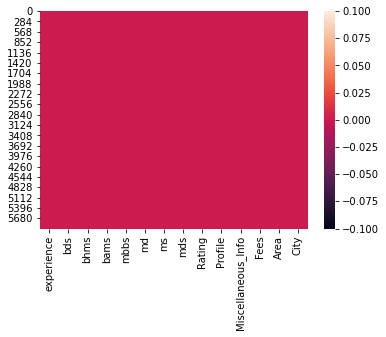

In [24]:
# visualizing null values using heatmap

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df_train.isnull())
plt.show()

No null values

In [25]:
# testing data

df_test.isnull().sum()

experience            0
bds                   0
bhms                  0
bams                  0
mbbs                  0
md                    0
ms                    0
mds                   0
Rating                0
Profile               0
Miscellaneous_Info    0
Area                  0
City                  0
dtype: int64

No null values

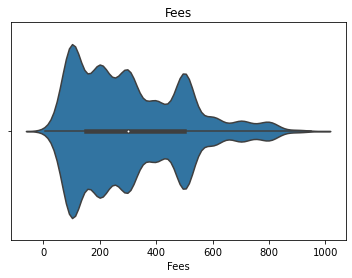

In [26]:
# Univariate analysis

# Fees

sns.violinplot(df_train["Fees"])
plt.title("Fees")
plt.show()

The data appears not to be normally distributed

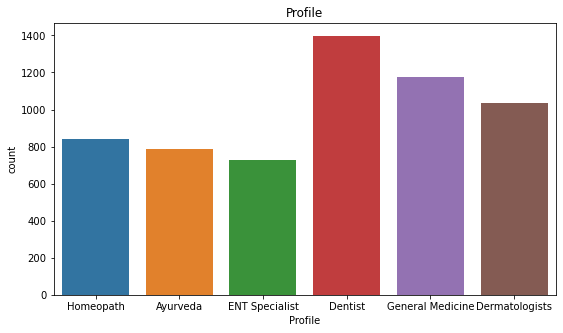

In [27]:
# Profile

plt.figure(figsize=(9,5))
sns.countplot(df_train["Profile"])
plt.title("Profile")
plt.show()

Most of the practitioners mentioned in the dataframe are dentists followed by general medicine

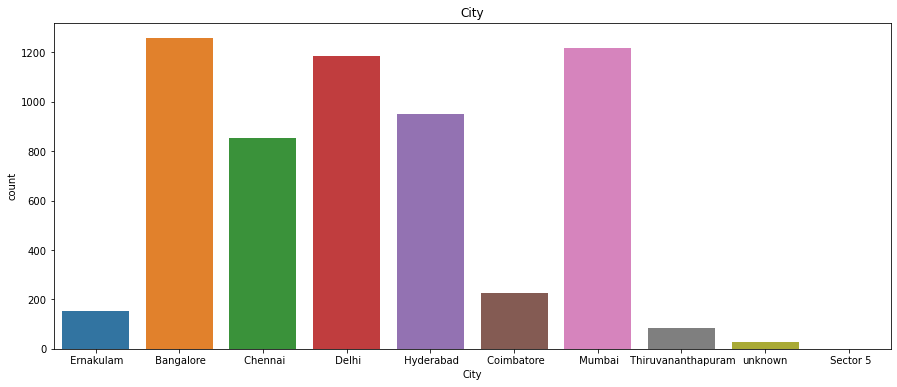

In [28]:
# Place

plt.figure(figsize=(15,6))
sns.countplot(df_train["City"])
plt.title("City")
plt.show()

Most of the entries are of Bangalore

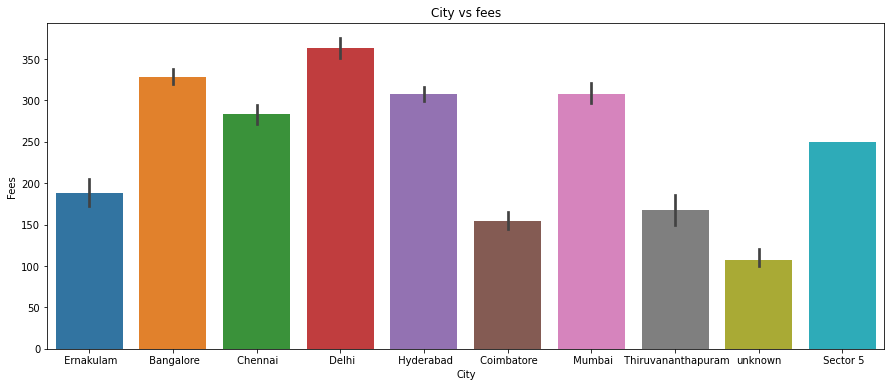

In [29]:
# Bivariate analysis

# City vs fees

plt.figure(figsize=(15,6))
sns.barplot(df_train["City"],df_train["Fees"])
plt.title("City vs fees")
plt.show()

Delhi corresponds to highest fees with Coimbatore corresponding to the lowest in the set

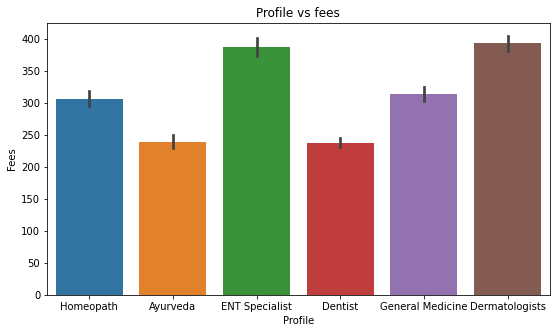

In [30]:
# profile vs fees

plt.figure(figsize=(9,5))
sns.barplot(df_train["Profile"],df_train["Fees"])
plt.title("Profile vs fees")
plt.show()

Dermatoligists charge the most with auyurveda being cost effective

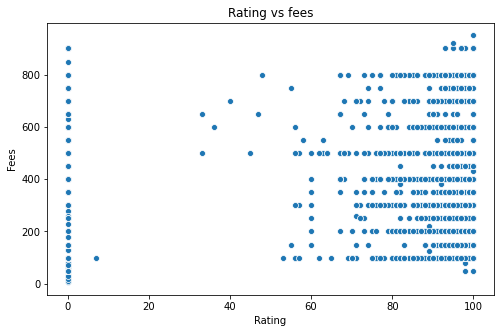

In [31]:
# Rating vs fees

plt.figure(figsize=(8,5))
sns.scatterplot(df_train["Rating"],df_train["Fees"])
plt.title("Rating vs fees")
plt.show()

we see no particular relationship of rating with fees

In [32]:
# Converting categorical to numerical data in training data

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

df_train[['Profile','Miscellaneous_Info','Area','City']] = df_train[['Profile','Miscellaneous_Info','Area','City']].apply(label_encoder.fit_transform)
df_train.head()

,experience,bds,bhms,bams,mbbs,md,ms,mds,Rating,Profile,Miscellaneous_Info,Fees,Area,City
0,24.0,0,1,0,0,1,1,0,100.0,5,1,100,296,4
1,12.0,0,0,1,0,1,1,0,98.0,0,1,350,855,0
2,9.0,0,0,0,1,0,1,0,0.0,3,0,300,452,0
3,12.0,0,0,1,0,0,1,0,0.0,0,1,250,68,0
4,20.0,0,0,1,0,0,1,0,100.0,0,1,250,335,1


In [33]:
# testing data

df_test[['Profile','Miscellaneous_Info','Area','City']] = df_test[['Profile','Miscellaneous_Info','Area','City']].apply(label_encoder.fit_transform)
df_test.head()

,experience,bds,bhms,bams,mbbs,md,ms,mds,Rating,Profile,Miscellaneous_Info,Area,City
0,35.0,0,0,0,1,0,0,0,0.0,4,0,142,6
1,31.0,0,0,0,1,0,0,0,0.0,3,0,577,5
2,40.0,0,0,0,1,0,0,0,70.0,2,1,212,1
3,0.0,0,0,1,0,0,1,0,0.0,0,0,373,3
4,16.0,1,0,0,0,1,0,1,100.0,1,1,231,0


In [34]:
# Correlation

df_train.corr()

,experience,bds,bhms,bams,mbbs,md,ms,mds,Rating,Profile,Miscellaneous_Info,Fees,Area,City
experience,1.000000,-0.196268,-0.114191,-0.047150,0.271347,-0.031598,-0.029452,-0.118095,-0.038569,0.202073,-0.120359,0.002117,0.000460,0.013826
bds,-0.196268,1.000000,-0.206141,-0.208341,-0.512244,0.165631,-0.402293,0.662902,0.230601,-0.473295,0.337009,-0.198635,0.016929,-0.011525
bhms,-0.114191,-0.206141,1.000000,-0.145019,-0.355083,-0.129913,0.501036,-0.144801,-0.094458,0.583268,-0.129822,-0.002423,-0.003793,0.015072
bams,-0.047150,-0.208341,-0.145019,1.000000,-0.358911,-0.146858,0.506383,-0.146346,-0.155166,-0.559943,-0.195451,-0.139891,-0.031692,0.044578
mbbs,0.271347,-0.512244,-0.355083,-0.358911,1.000000,0.010029,-0.318008,-0.360381,0.004911,0.355290,-0.030565,0.271038,0.014252,-0.067001
md,-0.031598,0.165631,-0.129913,-0.146858,0.010029,1.000000,-0.343913,0.480408,0.174677,-0.096192,0.194060,0.095383,0.002512,-0.000401
ms,-0.029452,-0.402293,0.501036,0.506383,-0.318008,-0.343913,1.000000,-0.282729,-0.189120,0.113800,-0.250908,-0.003847,-0.025337,0.024539
mds,-0.118095,0.662902,-0.144801,-0.146346,-0.360381,0.480408,-0.282729,1.000000,0.197994,-0.332459,0.266562,-0.086650,0.005988,-0.017806
Rating,-0.038569,0.230601,-0.094458,-0.155166,0.004911,0.174677,-0.189120,0.197994,1.000000,-0.126389,0.734893,0.153273,-0.045752,-0.106276
Profile,0.202073,-0.473295,0.583268,-0.559943,0.355290,-0.096192,0.113800,-0.332459,-0.126389,1.000000,-0.170498,0.145226,0.016637,-0.017894


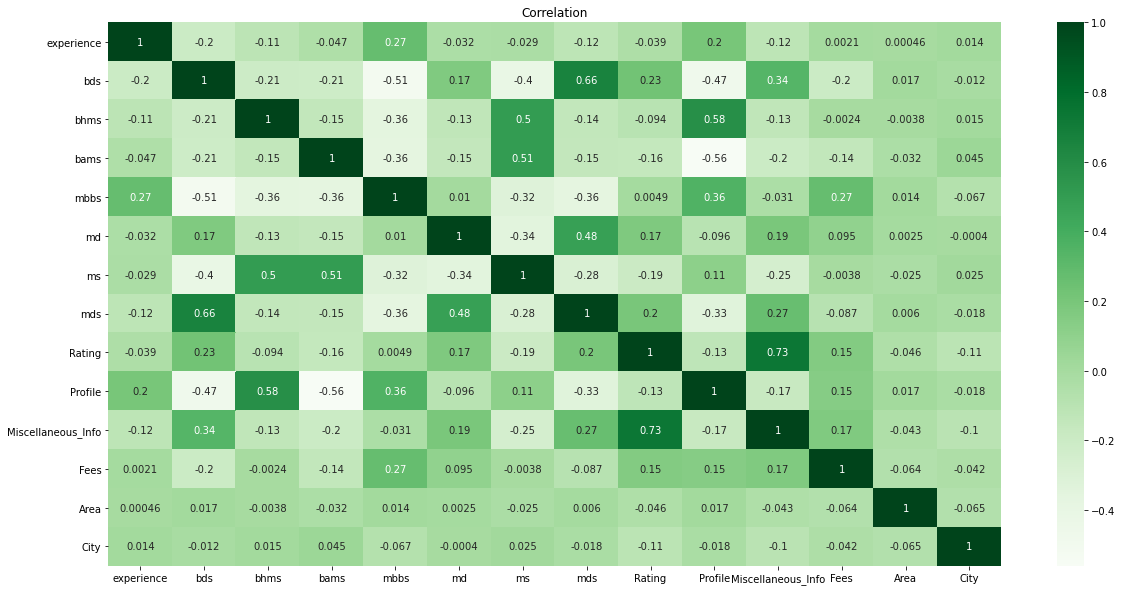

In [35]:
# Visualizing correlation

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.title("Correlation")
sns.heatmap(df_train.corr(),annot=True,cmap='Greens')
plt.show()

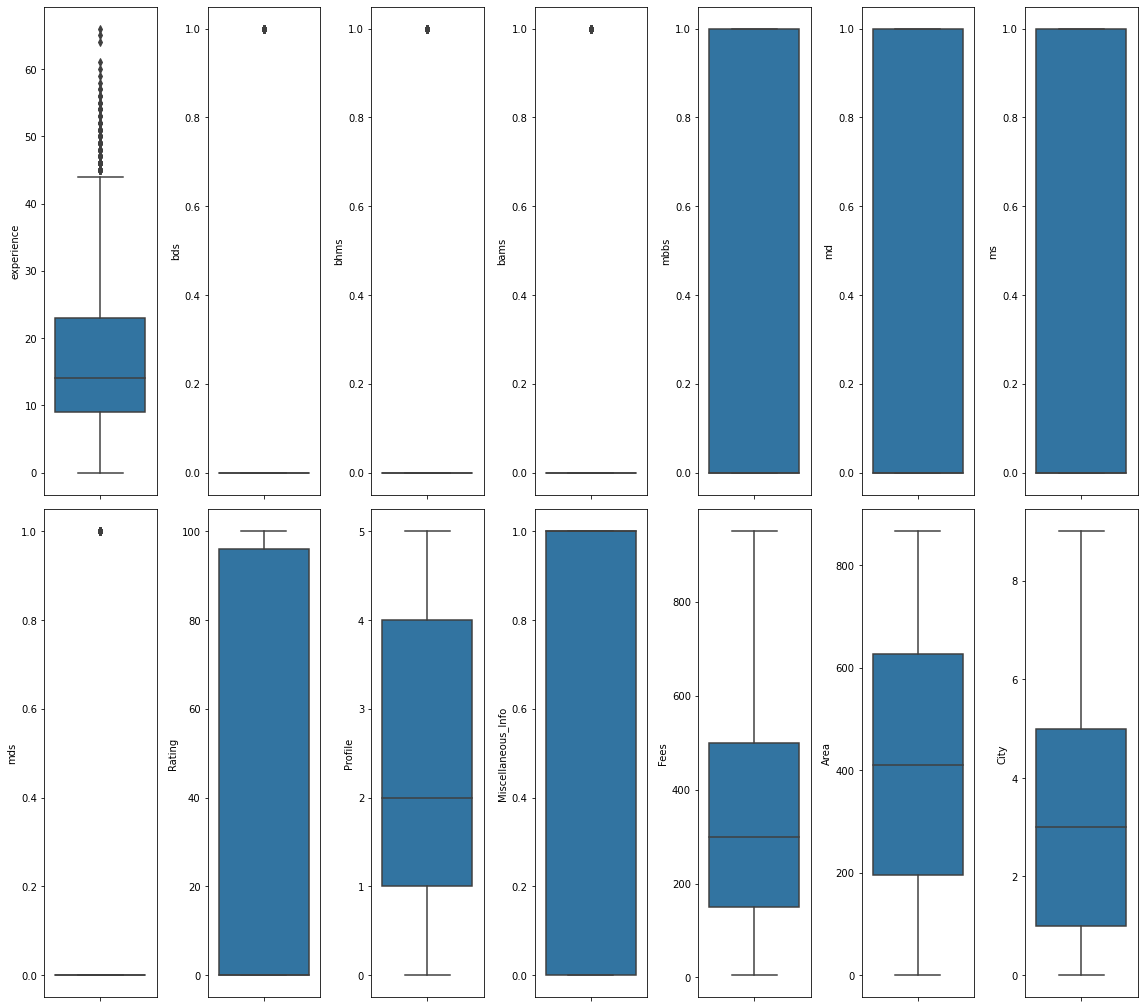

In [36]:
# Checking for outliers

collist = df_train.columns.values
ncol = 7
nrows = 5

plt.figure(figsize=(16,5*ncol))
for i in range(len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_train[collist[i]],orient = "v")
    plt.tight_layout()

In [37]:
# Removing outliers

from scipy.stats import zscore
z=np.abs(zscore(df_train))
df_new=df_train[(z<3).all(axis=1)]
df_new.head()

,experience,bds,bhms,bams,mbbs,md,ms,mds,Rating,Profile,Miscellaneous_Info,Fees,Area,City
0,24.0,0,1,0,0,1,1,0,100.0,5,1,100,296,4
1,12.0,0,0,1,0,1,1,0,98.0,0,1,350,855,0
2,9.0,0,0,0,1,0,1,0,0.0,3,0,300,452,0
3,12.0,0,0,1,0,0,1,0,0.0,0,1,250,68,0
4,20.0,0,0,1,0,0,1,0,100.0,0,1,250,335,1


In [38]:
df_train.shape

(5961, 14)

In [39]:
df_new.shape

(5903, 14)

In [40]:
df_train=df_new

In [41]:
# Splitting independent variables and target

x = df_train.drop('Fees',axis=1)
print(x.head())
y = df_train[['Fees']]
print("\n")
print(y.head())

   experience  bds  bhms  bams  mbbs  md  ms  mds  Rating  Profile  \
0        24.0    0     1     0     0   1   1    0   100.0        5   
1        12.0    0     0     1     0   1   1    0    98.0        0   
2         9.0    0     0     0     1   0   1    0     0.0        3   
3        12.0    0     0     1     0   0   1    0     0.0        0   
4        20.0    0     0     1     0   0   1    0   100.0        0   

   Miscellaneous_Info  Area  City  
0                   1   296     4  
1                   1   855     0  
2                   0   452     0  
3                   1    68     0  
4                   1   335     1  


   Fees
0   100
1   350
2   300
3   250
4   250


In [42]:
# Using Standard scaler for uniform range in all columns

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.646543,-0.54714,2.633275,-0.384413,-0.935499,1.253393,1.319274,-0.384413,1.216981,1.547726,0.882354,-0.453632,0.384428
1,-0.469405,-0.54714,-0.379755,2.601366,-0.935499,1.253393,1.319274,-0.384413,1.174750,-1.466138,0.882354,1.725280,-1.316042
2,-0.748393,-0.54714,-0.379755,-0.384413,1.068948,-0.797835,1.319274,-0.384413,-0.894577,0.342181,-1.133333,0.154436,-1.316042
3,-0.469405,-0.54714,-0.379755,2.601366,-0.935499,-0.797835,1.319274,-0.384413,-0.894577,-1.466138,0.882354,-1.342347,-1.316042
4,0.274560,-0.54714,-0.379755,2.601366,-0.935499,-0.797835,1.319274,-0.384413,1.216981,-1.466138,0.882354,-0.301615,-0.890924


In [43]:
# testing data

df_test = sc.fit_transform(df_test)
df_test = pd.DataFrame(df_test)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.506992,-0.523961,-0.377638,-0.373276,1.014703,-0.788696,-0.748101,-0.370646,-0.901887,0.901673,-1.175795,-0.852464,1.301192
1,1.155001,-0.523961,-0.377638,-0.373276,1.014703,-0.788696,-0.748101,-0.370646,-0.901887,0.297007,-1.175795,1.654240,0.861935
2,1.946982,-0.523961,-0.377638,-0.373276,1.014703,-0.788696,-0.748101,-0.370646,0.578901,-0.307658,0.850488,-0.449086,-0.895094
3,-1.572935,-0.523961,-0.377638,2.678984,-0.985510,-0.788696,1.336718,-0.370646,-0.901887,-1.516990,-1.175795,0.478682,-0.016580
4,-0.164968,1.908540,-0.377638,-0.373276,-0.985510,1.267916,-0.748101,2.697993,1.213525,-0.912324,0.850488,-0.339598,-1.334352


In [44]:
# Skewness

x.skew()

0     0.897661
1     1.280873
2     2.254093
3     2.217516
4     0.133483
5     0.455674
6     0.561423
7     2.217516
8     0.240969
9     0.121336
10   -0.251043
11    0.115796
12    0.081482
dtype: float64

In [45]:
for i in df_train.columns:
    if df_train[i].skew() > 0.55:
        df_train[i]=np.log1p(df_train[i])
    elif df_train[i].skew() < -0.55:
        df_train[i]=np.cbrt(df_train[i])

In [46]:
# Splitting into training and testing data

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [48]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor

In [49]:
model = [LinearRegression(),SVR(),DecisionTreeRegressor(),Lasso(),Ridge()]

for m in model:
    m.fit(x_train,y_train)
    print(m, "model")
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("r2", r2_score(y_test,predm))
    print("rmse", np.sqrt(mean_squared_error(y_test,predm)))
    print("\n")

LinearRegression() model
0.1616132896553104
r2 0.1484607725969287
rmse 175.43515529050006


SVR() model
0.10719770334596346
r2 0.1076024549115705
rmse 179.59468486057295


DecisionTreeRegressor() model
0.9968485370068392
r2 -0.46209358282518287
rmse 229.88036685458587


Lasso() model
0.16049281188679976
r2 0.14814551977413237
rmse 175.46762667189373


Ridge() model
0.1616132323726701
r2 0.1484653303224679
rmse 175.43468579577103




In [50]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
pred=rf.predict(x_test)
print("r2", r2_score(y_test,pred))
print("rmse", np.sqrt(mean_squared_error(y_test,pred)))

0.8854000238050397
r2 0.20990436379041044
rmse 168.98732356246776


In [51]:
# cross_val_score

from sklearn.model_selection import cross_val_score
cross_val_score(rf,x,y,cv=5).mean()

0.19789055241022147

In [52]:
# Saving the model

import joblib
joblib.dump(rf,'rf_Doctor,s_fees.pkl')

['rf_Doctor,s_fees.pkl']

In [53]:
# Loading the model

joblib_model = joblib.load('rf_Doctor,s_fees.pkl')
joblib_model

RandomForestRegressor()

In [54]:
# Using the loaded model

joblib_model.fit(x_train,y_train)
y_pred = joblib_model.predict(df_test)
predicted_fees = pd.DataFrame(y_pred)
predicted_fees

,0
0,376.00
1,379.50
2,482.70
3,250.00
4,209.00
...,...
1982,197.25
1983,314.00
1984,261.30
1985,185.00


In [55]:
# Saving predicted results in a csv file

predicted_fees.to_csv("Predected_Doctor's_fees.csv")